<center><font size = 6 color = blue face="黑体"> GDAL简介 </font></center>

<font size = 5 color = blue face="黑体"> GDAL </font>

GDAL是‘Geospatial Data Abstraction Library’缩写，是一个在X/MIT许可协议下的开源栅格空间数据转换库。  
GDAL可以用来对各种栅格数据格式进行读写，也可以用于格式相互转换，图像几何校正、重投影、重采样等。
GDAL提供对多种栅格数据的支持，包括Arc/Info ASCII Grid(asc)，GeoTiff (tiff)，Erdas Imagine Images(img)，ASCII DEM(dem) 等格式。
GDAL使用抽象数据模型(abstract data model)来解析它所支持的数据格式，抽象数据模型包括数据集(dataset)， 坐标系统，仿射地理坐标转换(Affine Geo Transform)， 大地控制点(GCPs)， 元数据(Metadata)，栅格波段(Raster Band)，颜色表(Color Table)， 子数据集域(Subdatasets Domain)，图像结构域(Image_Structure Domain)，XML域(XML:Domains)。

<font size = 5 color = blue face="黑体"> OGR</font>

OGR提供对矢量数据格式的读写支持，它所支持的文件格式包括：ESRI Shapefiles，S-57，SDTS,PostGIS，Oracle Spatial,Mapinfo mid/mif,Mapinfo TAB。
The GDAL/OGR website lists more than 70 vector formats that OGR is capable of reading, See www.gdal.org/ogr_formats.html or the list of all avail-able formats and specific details pertaining to each one. 
OGR包括如下几部分：  
Geometry：类Geometry (包括OGRGeometry等类)封装了OpenGIS的矢量数据模型，并提供了一些几何操作，WKB(Well Knows Binary)和WKT(Well Known Text)格式之间的相互转换，以及空间参考系统(投影)。  
Spatial Reference：类OGRSpatialReference封装了投影和基准面的定义。  
Feature：类OGRFeature封装了一个完整feature的定义，一个完整的feature包括一个geometry和geometry的一系列属性。  
Feature Definition：类OGRFeatureDefn里面封装了feature的属性，类型、名称及其默认的空间参考系统等。一个OGRFeatureDefn对象通常与一个层(layer)对应。  
Layer：类OGRLayer是一个抽象基类，表示数据源类OGRDataSource里面的一层要素(feature)。  
Data Source：类OGRDataSource是一个抽象基类，表示含有OGRLayer对象的一个文件或一个数据库。  
Drivers：类OGRSFDriver对应于每一个所支持的矢量文件格式。类OGRSFDriver由类OGRSFDriverRegistrar来注册和管理。
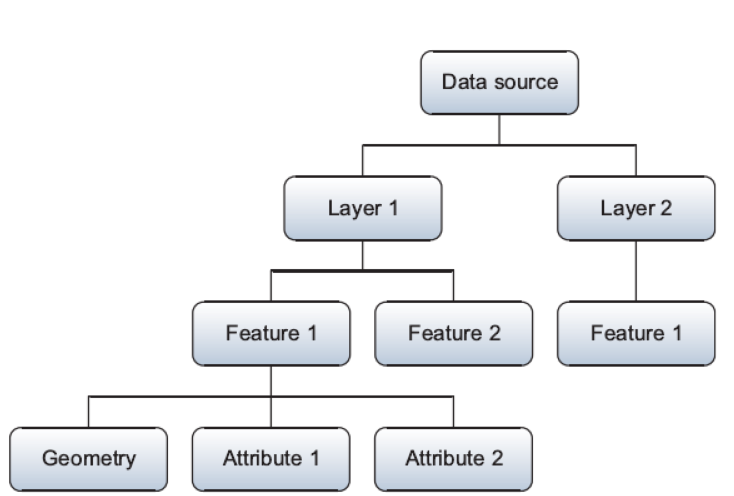

<center><font size = 6 color = blue face="幼圆"> Reading and Writing vector data </font></center>

Before you start working with OGR, it's useful to look at how various objects in the OGR universe are related to each other. If you don't  understand this hierarchy,then the steps required to read and write data won't make much sense.When you use OGR to open a data source,such  as a shapefile,GeoJSON file,SpatiaLite,or PostGIS database, you'll have a DataSource object. This data source can have one or more child Layer objects,one for each dataset contained in the datasource.Many vector data formats can only contain one dataset, But others,such as  SpatiaLite, can contain multiple datasets.Regardless of how manydatasets are in a data source, each one is considered a layer by OGR.Each  layer contains a collection of Featureobjects that holds the geometries and their attributes.

In [3]:
import os,sys
from osgeo import gdal,gdalconst
from osgeo import ogr

<font size = 5 color = blue face="黑体"> 1、读取数据源 DataSource</font>  
The first step to accessing any vector data is to open the data source. For this, you need to have an appropriate driver that tells OGR how to work with your data format.

In [4]:
#driver = ogr.GetDriverByName('ESRI Shapefile')     #载入数据驱动
fn = r'./test.shp'        #数据源的路劲，要写绝对路劲，可以配合os.chdir()
ds = driver.Open(fn,0)                             #打开数据源，open(<filename>, <update>)，其中update为0时，表示只读，为1时表示读写


In [5]:
type(driver)

osgeo.ogr.Driver

In [6]:
# 查看driver的操作
dir(driver)

['CopyDataSource',
 'CreateDataSource',
 'DeleteDataSource',
 'Deregister',
 'GetDescription',
 'GetMetadata',
 'GetMetadataDomainList',
 'GetMetadataItem',
 'GetMetadata_Dict',
 'GetMetadata_List',
 'GetName',
 'Open',
 'Register',
 'SetDescription',
 'SetMetadata',
 'SetMetadataItem',
 'TestCapability',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'name',
 'this',
 'thisown']

In [8]:
# 查看数据源ds的操作
dir(ds)

['CommitTransaction',
 'CopyLayer',
 'CreateLayer',
 'DeleteLayer',
 'Dereference',
 'Destroy',
 'ExecuteSQL',
 'FlushCache',
 'GetDescription',
 'GetDriver',
 'GetLayer',
 'GetLayerByIndex',
 'GetLayerByName',
 'GetLayerCount',
 'GetMetadata',
 'GetMetadataDomainList',
 'GetMetadataItem',
 'GetMetadata_Dict',
 'GetMetadata_List',
 'GetName',
 'GetRefCount',
 'GetStyleTable',
 'GetSummaryRefCount',
 'Reference',
 'Release',
 'ReleaseResultSet',
 'RollbackTransaction',
 'SetDescription',
 'SetMetadata',
 'SetMetadataItem',
 'SetStyleTable',
 'StartTransaction',
 'SyncToDisk',
 'TestCapability',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__s

<font size = 5 color = blue face="黑体">2、读取图层 Layer</font>

In [7]:
#获取该数据源中的图层个数，一般shp文件数据图层只有一个，如果是mdb、dxf等数据会有多个图层
lyr_count = ds.GetLayerCount()
lyr_count

1

In [13]:
#获取图层
lyr = ds.GetLayer(0)  
#lyr = ds.GetLayer()  默认为0，如果只有一个图层就可以缺省，多个图层就需要相应图层的层数

In [14]:
# 查看图层的操作
dir(lyr)

['AlterFieldDefn',
 'Clip',
 'CommitTransaction',
 'CreateFeature',
 'CreateField',
 'CreateFields',
 'CreateGeomField',
 'DeleteFeature',
 'DeleteField',
 'Dereference',
 'Erase',
 'FindFieldIndex',
 'GetDescription',
 'GetExtent',
 'GetFIDColumn',
 'GetFeature',
 'GetFeatureCount',
 'GetFeaturesRead',
 'GetGeomType',
 'GetGeometryColumn',
 'GetLayerDefn',
 'GetMetadata',
 'GetMetadataDomainList',
 'GetMetadataItem',
 'GetMetadata_Dict',
 'GetMetadata_List',
 'GetName',
 'GetNextFeature',
 'GetRefCount',
 'GetSpatialFilter',
 'GetSpatialRef',
 'GetStyleTable',
 'Identity',
 'Intersection',
 'Reference',
 'ReorderField',
 'ReorderFields',
 'ResetReading',
 'RollbackTransaction',
 'SetAttributeFilter',
 'SetDescription',
 'SetFeature',
 'SetIgnoredFields',
 'SetMetadata',
 'SetMetadataItem',
 'SetNextByIndex',
 'SetSpatialFilter',
 'SetSpatialFilterRect',
 'SetStyleTable',
 'StartTransaction',
 'SymDifference',
 'SyncToDisk',
 'TestCapability',
 'Union',
 'Update',
 '__bool__',
 '__clas

In [15]:
#获取图层的基本信息，包括图层定义信息、图层的投影信息，数据范围、对象类型等
Defn = lyr.GetLayerDefn()   #获取图层定义信息
#DefnNames = []
#DefnTypes = []
fieldList = []
DefnFieldCount = Defn.GetFieldCount()
for i in range(DefnFieldCount):
    DefnField = Defn.GetFieldDefn(i)
    fielddict = {'name':DefnField.GetName(),'type':DefnField.GetType(),
                 'width':DefnField.GetWidth(),'decimal':DefnField.GetPrecision()}
    fieldList += [fielddict]
    #name = DefnField.GetNameRef()#获取字段名称
    #ntype = DefnField.GetFieldTypeName(DefnField.GetType())
    #DefnNames.append(name)
    #DefnTypes.append(ntype)

In [16]:
fieldList

[{'name': 'OBJECTID_1', 'type': 0, 'width': 9, 'decimal': 0},
 {'name': 'OBJECTID', 'type': 0, 'width': 9, 'decimal': 0},
 {'name': 'OBJECTID_2', 'type': 0, 'width': 9, 'decimal': 0},
 {'name': 'DSMC', 'type': 4, 'width': 50, 'decimal': 0},
 {'name': 'QXMC', 'type': 4, 'width': 50, 'decimal': 0},
 {'name': 'XZMC', 'type': 4, 'width': 50, 'decimal': 0},
 {'name': 'CUNMC', 'type': 4, 'width': 50, 'decimal': 0},
 {'name': 'CUNDM', 'type': 4, 'width': 50, 'decimal': 0},
 {'name': 'GCUNDM', 'type': 4, 'width': 50, 'decimal': 0},
 {'name': 'TBLXDM', 'type': 4, 'width': 50, 'decimal': 0},
 {'name': 'TBLXMC', 'type': 4, 'width': 50, 'decimal': 0},
 {'name': 'SFYF', 'type': 4, 'width': 50, 'decimal': 0},
 {'name': 'YFBH', 'type': 4, 'width': 50, 'decimal': 0},
 {'name': 'YFDKBH', 'type': 4, 'width': 50, 'decimal': 0},
 {'name': 'XZB', 'type': 2, 'width': 19, 'decimal': 11},
 {'name': 'YZB', 'type': 2, 'width': 19, 'decimal': 11},
 {'name': 'TBMJ', 'type': 2, 'width': 19, 'decimal': 11},
 {'name

In [ ]:
#另一种获取图层定义信息的方法
#Defn = lyr.GetLayerDefn()   #获取图层定义信息
#DefnNames = []
#DefnTypes = []
fieldList1 = []
#DefnFieldCount = Defn.GetFieldCount()
for field in lyr.schema:    #schema是lyr的属性
    #DefnField = Defn.GetFieldDefn(i)
    fielddict = {'name':field.GetName(),'type':field.GetType(),
                 'width':field.GetWidth(),'decimal':field.GetPrecision()}
    fieldList1 += [fielddict]

In [ ]:
fieldList1

In [ ]:
#获取图层投影信息
Spatialref = lyr.GetSpatialRef()  
print(Spatialref)

In [ ]:
#获取图层对象类型
geom_type = lyr.GetGeomType()
print(geom_type)
#获取图层集合类型，返回值为数字,  返回值1:点， 2：线， 3：面
print(geom_type == ogr.wkbPoint)         #False
print(geom_type == ogr.wkbLineString)    #False
print(geom_type == ogr.wkbPolygon)       #True

In [ ]:
#获取图层范围
lyr_extent = lyr.GetExtent()
print(lyr_extent)
print('ul:{},{}'.format(lyr_extent[0],lyr_extent[3]))  # ul:upperleft的坐标
print('lr:{},{}'.format(lyr_extent[1],lyr_extent[2]))  # lr:lowerright的坐标

<font size = 5 color = blue face="黑体">3、读取图层中的要素 Feature</font>

In [17]:
#查看Feature的方法和属性
feat_1 = lyr.GetFeature(0)
dir(feat_1)

['Clone',
 'Dereference',
 'Destroy',
 'DumpReadable',
 'Equal',
 'ExportToJson',
 'FillUnsetWithDefault',
 'GetDefnRef',
 'GetFID',
 'GetField',
 'GetFieldAsBinary',
 'GetFieldAsDateTime',
 'GetFieldAsDouble',
 'GetFieldAsDoubleList',
 'GetFieldAsInteger',
 'GetFieldAsInteger64',
 'GetFieldAsInteger64List',
 'GetFieldAsIntegerList',
 'GetFieldAsString',
 'GetFieldAsStringList',
 'GetFieldCount',
 'GetFieldDefnRef',
 'GetFieldIndex',
 'GetFieldType',
 'GetGeomFieldCount',
 'GetGeomFieldDefnRef',
 'GetGeomFieldIndex',
 'GetGeomFieldRef',
 'GetGeometryRef',
 'GetNativeData',
 'GetNativeMediaType',
 'GetStyleString',
 'IsFieldNull',
 'IsFieldSet',
 'IsFieldSetAndNotNull',
 'Reference',
 'SetFID',
 'SetField',
 'SetField2',
 'SetFieldBinaryFromHexString',
 'SetFieldDoubleList',
 'SetFieldInteger64',
 'SetFieldInteger64List',
 'SetFieldIntegerList',
 'SetFieldNull',
 'SetFieldString',
 'SetFieldStringList',
 'SetFrom',
 'SetFromWithMap',
 'SetGeomField',
 'SetGeomFieldDirectly',
 'SetGeomet

In [18]:
#遍历所有要素
featcount = lyr.GetFeatureCount()    # 获取图层中要素个数
for i in range(featcount):
    feat = lyr.GetFeature(i)
    #print(feat)
#for feat in lyr:
    #print(feat)
#last_feature = lyr.GetFeature(num_features - 1)   # 获取最后一个要素#
#for i in range(DefnFieldCount):    #方法一：遍历最后一个要素中所有属性内容
    #print(last_feature.GetField(i))

In [19]:
feat = lyr.GetNextFeature()
i = 0
while feat:
    feat = lyr.GetNextFeature()
    i+=1
    #print(feat)
    
lyr.ResetReading()  #复位
print(i)
print(featcount)

2929
2929


In [20]:
#单个要素的属性获取
#获取要素属性和几何信息
print(feat_1.geometry().GetX())
for g in feat_1.geometry(): #获取集合信息
    print(g.GetX(),g.GetY())
for fd in fieldList:   #获取属性信息
    print(feat_1.GetField(fd['name']))

0.0
320217.26199999824 3634684.6399999997
1
128
0
西安市
户县
None
八什村
610125202210
610125202210
301
森林
否
None
None
108.530018687
34.0631869387
3122.61496796
301
3122.61496796
None
0.0
None
0.0
None
0.0
None
0.0
None
0.0
None
0.0
None
0.0
0.0
None
None
264.264607645
264.264607645
3122.61496796


In [21]:
fieldList

[{'name': 'OBJECTID_1', 'type': 0, 'width': 9, 'decimal': 0},
 {'name': 'OBJECTID', 'type': 0, 'width': 9, 'decimal': 0},
 {'name': 'OBJECTID_2', 'type': 0, 'width': 9, 'decimal': 0},
 {'name': 'DSMC', 'type': 4, 'width': 50, 'decimal': 0},
 {'name': 'QXMC', 'type': 4, 'width': 50, 'decimal': 0},
 {'name': 'XZMC', 'type': 4, 'width': 50, 'decimal': 0},
 {'name': 'CUNMC', 'type': 4, 'width': 50, 'decimal': 0},
 {'name': 'CUNDM', 'type': 4, 'width': 50, 'decimal': 0},
 {'name': 'GCUNDM', 'type': 4, 'width': 50, 'decimal': 0},
 {'name': 'TBLXDM', 'type': 4, 'width': 50, 'decimal': 0},
 {'name': 'TBLXMC', 'type': 4, 'width': 50, 'decimal': 0},
 {'name': 'SFYF', 'type': 4, 'width': 50, 'decimal': 0},
 {'name': 'YFBH', 'type': 4, 'width': 50, 'decimal': 0},
 {'name': 'YFDKBH', 'type': 4, 'width': 50, 'decimal': 0},
 {'name': 'XZB', 'type': 2, 'width': 19, 'decimal': 11},
 {'name': 'YZB', 'type': 2, 'width': 19, 'decimal': 11},
 {'name': 'TBMJ', 'type': 2, 'width': 19, 'decimal': 11},
 {'name

In [22]:
#获取所有要素的几何信息和属性信息
#样例数据要数个数较多，仅示范获取前5个要素的几何信息和属性信息 
geomlist = []
reclist = []
feat = lyr.GetNextFeature()
i = 0
while feat:
    feat = lyr.GetNextFeature()
    
    geom = feat.GetGeometryRef().ExportToWkt()
    geomlist.append(geom)
    rec = {}
    for fd in fieldList:
        rec[fd['name']] = feat.GetField(fd['name'])
    reclist += [rec]
    i+=1
    if i == 5:
        break


In [32]:
for fd in fieldList:
    print(fd['name'])

OBJECTID_1
OBJECTID
OBJECTID_2
DSMC
QXMC
XZMC
CUNMC
CUNDM
GCUNDM
TBLXDM
TBLXMC
SFYF
YFBH
YFDKBH
XZB
YZB
TBMJ
QZW
QZWMJ
QCYZW
QCYZWMJ
CBZW
CBZWMJ
CCYZW
CCYZWMJ
XBZW
XBZWMJ
XCYZW
XCYZWMJ
SNYD
SNFZCS
SNZWMC
SNZWMJ
JCYX
NHXM
BZ
Shape_Leng
Shape_Le_1
Shape_Area


In [23]:
reclist

[{'OBJECTID_1': 2,
  'OBJECTID': 153,
  'OBJECTID_2': 0,
  'DSMC': '西安市',
  'QXMC': '户县',
  'XZMC': None,
  'CUNMC': '八什村',
  'CUNDM': '610125202210',
  'GCUNDM': '610125202210',
  'TBLXDM': '301',
  'TBLXMC': '森林',
  'SFYF': '否',
  'YFBH': None,
  'YFDKBH': None,
  'XZB': 108.529600845,
  'YZB': 34.0629983605,
  'TBMJ': 1213.58635372,
  'QZW': '301',
  'QZWMJ': 1213.58635372,
  'QCYZW': None,
  'QCYZWMJ': 0.0,
  'CBZW': None,
  'CBZWMJ': 0.0,
  'CCYZW': None,
  'CCYZWMJ': 0.0,
  'XBZW': None,
  'XBZWMJ': 0.0,
  'XCYZW': None,
  'XCYZWMJ': 0.0,
  'SNYD': None,
  'SNFZCS': 0.0,
  'SNZWMC': None,
  'SNZWMJ': 0.0,
  'JCYX': 0.0,
  'NHXM': None,
  'BZ': None,
  'Shape_Leng': 283.405691544,
  'Shape_Le_1': 283.405597788,
  'Shape_Area': 1213.58635372},
 {'OBJECTID_1': 3,
  'OBJECTID': 1344,
  'OBJECTID_2': 0,
  'DSMC': '西安市',
  'QXMC': '户县',
  'XZMC': None,
  'CUNMC': '张良寨村',
  'CUNDM': '610125103214',
  'GCUNDM': '610125103214',
  'TBLXDM': '107',
  'TBLXMC': '农作物',
  'SFYF': '否',
  'YFBH'

In [24]:
geomlist

['POLYGON ((320167.456500001 3634683.8133,320167.3233 3634683.0646,320167.303 3634683.064,320167.304900002 3634682.9623,320168.090700001 3634641.9017,320160.977899998 3634638.8383,320157.728500001 3634638.8383,320157.555100001 3634656.3711,320154.6611 3634722.1327,320154.432300001 3634724.7135,320150.300099999 3634771.3219,320158.977499999 3634772.1973,320164.9023 3634691.8411,320167.456500001 3634683.8133))',
 'POLYGON ((338217.57 3637282.787,338205.079 3637281.412,338196.122699998 3637442.2003,338198.9934 3637442.4367,338208.143199999 3637443.3999,338217.577799998 3637282.7879,338217.57 3637282.787))',
 'POLYGON ((338233.979400001 3637284.5936,338217.577799998 3637282.7879,338208.143199999 3637443.3999,338212.029199999 3637443.8089,338223.475099999 3637441.9012,338232.972899999 3637311.8525,338233.979400001 3637284.5936))',
 'POLYGON ((332339.497200001 3653298.9465,332348.0779 3653125.9902,332335.688700002 3653126.0851,332325.393800002 3653297.9391,332339.497200001 3653298.9465))',
 

<font size = 5 color = blue face="黑体">4、创建新的矢量文件</font>

In [ ]:
fieldList1

In [ ]:
from osgeo import osr

In [ ]:
ds_c = driver.CreateDataSource('test2.shp')
#创建cgcs2000坐标
srs = osr.SpatialReference()
srs.ImportFromEPSG(4490)
lyr_c = ds_c.CreateLayer('NO.2',srs,ogr.wkbPolygon)
#
fname = ogr.FieldDefn('Name', ogr.OFTString)
fname.SetWidth(50)
lyr_c.CreateField(fname)
fcx = ogr.FieldDefn('CenterX', ogr.OFTReal)
lyr_c.CreateField(fcx)
fcy = ogr.FieldDefn('CenterY', ogr.OFTReal)
lyr_c.CreateField(fcy)
fzwdm = ogr.FieldDefn('ZWDM', ogr.OFTString)
fzwdm.SetWidth(50)
lyr_c.CreateField(fzwdm)
for feat in lyr:
    feature = ogr.Feature(lyr_c.GetLayerDefn())
    feature.SetField('Name', feat.GetField('CUNMC'))
    feature.SetField('CenterX', feat.GetField('XZB'))
    feature.SetField('CenterY', feat.GetField('YZB'))
    feature.SetField('ZWDM', feat.GetField('TBLXDM'))
    geom = feat.geometry()
    feature.SetGeometry(geom)
    lyr_c.CreateFeature(feature)
    del feature
#ds1.FlushCache()
del ds_c  

In [ ]:
ds_c1 = ogr.Open(r'C:\Users\xtxn3\python_learning\test2.shp',0)
lyr_c1 = ds_c1.GetLayer()

In [ ]:
print(lyr_c1.GetSpatialRef())

In [ ]:
import ospybook as pb
pb.print_attributes(fn,3,['TBLXDM','TBMJ'])

In [ ]:
#osgeopy code
# write vetor data
ds = ogr.Open(r'D:\Python_Study\osgeopy\osgeopy-data\osgeopy-data\osgeopy-data-global\osgeopy-data\global',1)
if ds is None:
    sys.exit('Could not open folder.')
in_lyr = ds.GetLayer('ne_50m_populated_places')
if ds.GetLayer('capital_cities'):
    ds.DeleteLayer('capital_cities')
out_lyr = ds.CreateLayer('capital_cities', in_lyr.GetSpatialRef(),ogr.wkbPoint)
out_lyr.CreateFields(in_lyr.schema)
out_defn = out_lyr.GetLayerDefn()
out_feat = ogr.Feature(out_defn)
for in_feat in in_lyr:
    if in_feat.GetField('FEATURECLA') == 'Admin-0 capital':
        geom = in_feat.geometry()
        out_feat.SetGeometry(geom)
        for i in range(in_feat.GetFieldCount()):
            value = in_feat.GetField(i)
            out_feat.SetField(i,value)
        out_lyr.CreateFeature(out_feat)
del ds

In [ ]:
#检查待创建DataSource是否已经存在，存在的话 就删除
shape_fn = r'D:\Python_Study\osgeopy\osgeopy-data\osgeopy-data\osgeopy-data-global\osgeopy-data\global\capital_cities.shp'
if os.path.exists(shape_fn):
    driver.DeleteDataSource(shape_fn)

In [ ]:
shape_ds = driver.CreateDataSource(shape_fn)    
if shape_ds is None:
    sys.exit('Could not create {0}.'.format(shape_fn))

In [ ]:
#type(shape_ds)
in_ds = ogr.Open(r'D:\Python_Study\osgeopy\osgeopy-data\osgeopy-data\osgeopy-data-global\osgeopy-data\global\ne_50m_populated_places.shp',1)
#in_ds.GetLayerCount()
in_lyr = in_ds.GetLayer()
#图层定义信息
in_fieldList = []
for in_feat in in_lyr.schema:
    fielddict = {'name':in_feat.GetName(),'type':in_feat.GetType(),
                 'width':in_feat.GetWidth(),'decimal':in_feat.GetPrecision()}
    in_fieldList += [fielddict]

In [ ]:
in_fieldList

In [ ]:
out_lyr = shape_ds.CreateLayer('capital_cities', in_lyr.GetSpatialRef(),ogr.wkbPoint)

In [ ]:
fname = ogr.FieldDefn('City_Name', ogr.OFTString)
fname.SetWidth(100)
out_lyr.CreateField(fname)
fcx = ogr.FieldDefn('LATITUDE', ogr.OFTReal)
out_lyr.CreateField(fcx)
fcy = ogr.FieldDefn('LONGITUDE', ogr.OFTReal)
out_lyr.CreateField(fcy)
for in_feat in in_lyr:
    feature = ogr.Feature(out_lyr.GetLayerDefn())
    feature.SetField('City_Name', in_feat.GetField('City_Name'))
    feature.SetField('LATITUDE', in_feat.GetField('LATITUDE'))
    feature.SetField('LONGITUDE', in_feat.GetField('LONGITUDE'))
    geom = in_feat.geometry()
    feature.SetGeometry(geom)
    out_lyr.CreateFeature(feature)
    del feature
del shape_ds

In [ ]:
ds = ogr.Open(r'D:\Python_Study\osgeopy\osgeopy-data\osgeopy-data\osgeopy-data-global\osgeopy-data\global\ne_50m_populated_places.shp',1)
ds.GetLayerCount()    
lyr = ds.GetLayer(0)
lyr.GetFeatureCount()
#feature = lyr.GetFeature(0)
for feat in lyr:
    field_1 = feat.GetField('name')
    print(field_1)
#for i in range(feature.GetFieldCount()):
    #print(feature.GetField(i))
#for feat in lyr:
    #for i in range(lyr)

In [ ]:
# Updating existing data
# Changing the layer definition
# AlterFieldDefn(iField, field_def, nFlags)
# iField is the index of the field you want to change. A field name won’t work inthis case.
# field_def is the new field definition object.
# n Flags is an integer that is the sum of one or more of the constants
ds = ogr.Open(r'D:\Python_Study\osgeopy\osgeopy-data\osgeopy-data\osgeopy-data-global\osgeopy-data\global\ne_50m_admin_0_countries.shp',1)
ds.GetLayerCount()    
lyr1 = ds.GetLayer(0)
i = lyr1.GetLayerDefn().GetFieldIndex('City_Name')
fld_defn = ogr.FieldDefn('name', ogr.OFTString)
lyr1.AlterFieldDefn(i, fld_defn, ogr.ALTER_NAME_FLAG)

<center><font size = 6 color = blue face="幼圆"> Filtering data with OGR </font></center>

<font size = 5 color = blue face="黑体">1、Attribute filters</font>

In [ ]:
%matplotlib inline

In [ ]:
ds = ogr.Open(r'D:\Python_Study\osgeopy\osgeopy-data\osgeopy-data\osgeopy-data-global\osgeopy-data\global',1)
lyr = ds.GetLayer('ne_50m_admin_0_countries')

In [ ]:
import ospybook as pb
from ospybook.vectorplotter import VectorPlotter
vp = VectorPlotter(True)
vp.plot(lyr, fill=False)

In [ ]:
pb.print_attributes(lyr, 4, ['name'], geom=False)

In [ ]:
lyr.SetAttributeFilter("continent = 'Asia'")

In [ ]:
lyr.GetFeatureCount()
vp.plot(lyr, 'y')

In [ ]:
lyr.SetAttributeFilter("continent = 'South America'")
vp.plot(lyr, 'b')

In [ ]:
lyr.SetAttributeFilter(None)
lyr.GetFeatureCount()

数字比较或者数字条件筛选不需要在数字周围加‘’  
'Population < 50000'   
字符比较需要在字符加‘’  
'Name = "Cairo"'                                     
"Name = 'Moscow'"    
'Name != "Tokyo"'  


In [ ]:
#上述程序中：'continent == "Asia"'
lyr.SetAttributeFilter('continent = "Asia"')
lyr.GetFeatureCount() 
# 返回值为241 说明并未选中Asia

In [ ]:
#上述程序中：“continent == 'Asia'”
lyr.SetAttributeFilter("continent = 'Asia'" )
lyr.GetFeatureCount() 
#返回值为53，说明选中了Asia
#说明字符串筛选条件中，引号的先后影响到结果“''”

In [ ]:
#复合条件查找
lyr.SetAttributeFilter("continent = 'Asia' and subregion = 'Eastern Asia'" )
lyr.GetFeatureCount()

<font size = 5 color = blue face="黑体">2、Spatial filters</font>

In [ ]:
city_lyr.SetSpatialFilter(None)
city_lyr.GetFeatureCount()
vp.plot(city_lyr,'b.')
city_lyr = ds.GetLayer('ne_50m_populated_places')
city_lyr.GetFeatureCount()
lyr.SetAttributeFilter("name = 'Germany'")
feat = lyr.GetNextFeature()
germany = feat.geometry().Clone()
city_lyr.SetSpatialFilter(germany)
city_lyr.GetFeatureCount()
vp.plot(city_lyr,'yo')

In [ ]:
lyr.SetAttributeFilter("name = 'Germany'")
lyr.GetFeatureCount()

<center><font size = 6 color = blue face="幼圆"> Manipulating geometries with OGR </font></center>

<font size = 5 color = blue face="黑体">1、Working with points</font>

In [1]:
import ospybook as pb
from ospybook.vectorplotter import VectorPlotter
vp = VectorPlotter(True)

ModuleNotFoundError: No module named 'ospybook'

In [4]:
# Creating and editing single points
# first  step  tobuilding any type of geometry with OGR is to cre-ate  an  empty  Geometry  object 
point = ogr.Geometry(ogr.wkbPoint)
point.AddPoint(59.5, 11.5)
print(point)
#坐标中0代表z，不影响结果

POINT (59.5 11.5 0)


In [5]:
#获取点的个数
point.GetPointCount()

1

In [6]:
x,y = point.GetX(0), point.GetY(0)
print(x,y)

59.5 11.5


In [7]:
vp.plot(point,'bo')
point.AddPoint(59.5, 13)
vp.plot(point, 'rs')

NameError: name 'vp' is not defined

In [8]:
#对已有的point AddPoint会重新覆盖之前的Point的信息
print(point)

POINT (59.5 11.5 0)


In [ ]:
#SetPoint(),修改点的坐标信息
point.SetPoint(0,59.5,11.0)
print(point)

In [9]:
#Creating and editing multipoints: multiple points as one geometry
points = ogr.Geometry(ogr.wkbMultiPoint)
point = ogr.Geometry(ogr.wkbPoint)
point.AddPoint(67.5, 16)
points.AddGeometry(point)
point.AddPoint(73, 31)
points.AddGeometry(point)
point.AddPoint(91, 24.5)
points.AddGeometry(point)
#vp.clear()
#vp.plot(points,'bo')

0

In [10]:
#print(points)

for i in range(points.GetGeometryCount()):
    print(points.GetGeometryRef(i))
    print('第{}个点的X坐标:{},Y坐标:{}'.format(i+1,points.GetGeometryRef(i).GetX(),points.GetGeometryRef(i).GetY()))
    #print(points.GetGeometryRef(i).GetY())

POINT (67.5 16.0 0)
第1个点的X坐标:67.5,Y坐标:16.0
POINT (73 31 0)
第2个点的X坐标:73.0,Y坐标:31.0
POINT (91.0 24.5 0)
第3个点的X坐标:91.0,Y坐标:24.5


In [11]:
#修改其中某个点的坐标信息
points.GetGeometryRef(0).AddPoint(70.0,16.0)
print(points)

MULTIPOINT (70 16 0,73 31 0,91.0 24.5 0)


In [12]:
#Creating and editing single lines
line = ogr.Geometry(ogr.wkbLineString)
line.AddPoint(54, 37)
line.AddPoint(62, 35.5)
line.AddPoint(70.5, 38)
line.AddPoint(74.5, 41.5)
#vp.plot(line, 'b-')

In [13]:
#获取线段每个拐点坐标
for i in range(line.GetPointCount()):
    print(line.GetPoint(i))
#line.GetPoint(0)

(54.0, 37.0, 0.0)
(62.0, 35.5, 0.0)
(70.5, 38.0, 0.0)
(74.5, 41.5, 0.0)


In [14]:
#前述通points.GetGeometryCount()获取复合点构成的集合体中点的个数
#line中通过line.GeometryCount()返回值为0，是因为line不是一个几何集合体，是单个对象
line.GetGeometryCount()

0

In [15]:
#line.GetPoint 与 line.GetPoints 的区别
print(line.GetPoint())
print(line.GetPoints())

(54.0, 37.0, 0.0)
[(54.0, 37.0, 0.0), (62.0, 35.5, 0.0), (70.5, 38.0, 0.0), (74.5, 41.5, 0.0)]


In [16]:
#需要在线段中添加一个拐点坐标时
vertices = line.GetPoints()
vertices[2:2] = [(66.5, 35)]
print(vertices)

[(54.0, 37.0, 0.0), (62.0, 35.5, 0.0), (66.5, 35), (70.5, 38.0, 0.0), (74.5, 41.5, 0.0)]


In [ ]:
new_line = ogr.Geometry(ogr.wkbLineString)
for vertex in vertices:
    new_line.AddPoint(*vertex)
vp.plot(new_line, 'g:')
# The Python * operator 
#Using the * operator explodes vertex into two parameters that are successfully passed to AddPoint. 
#Forgetting the * operator only passes one parameter, a tuple.
#But AddPoint expects at least two parameters, an x and a y, so it fails.

In [ ]:
#if you want to add new points after the existing 5th, 11th, 19th, and 26th vertices，
#you’d want to add the vertices at the end of the line first
#如果按照给定的位置添加新的拐点，需要从后往前添加，因为从前往后添加的话，之后的插入位置会发生变化

In [ ]:
#Creating and editing multilines
line1 = ogr.Geometry(ogr.wkbLineString)
line1.AddPoint(61.5, 29)
line1.AddPoint(63, 20)
line1.AddPoint(62.5, 16)
line1.AddPoint(60, 13)

line2 = ogr.Geometry(ogr.wkbLineString)
line2.AddPoint(60.5, 12)
line2.AddPoint(68.5,13.5)

line3 = ogr.Geometry(ogr.wkbLineString)
line3.AddPoint(69.5,33)
line3.AddPoint(80,33)
line3.AddPoint(86.5,22.5)

lines = ogr.Geometry(ogr.wkbMultiLineString)
lines.AddGeometry(line1)
lines.AddGeometry(line2)
lines.AddGeometry(line3)

vp.plot(lines,'g-')

In [ ]:
#lines是一个几何体 由3条线组成
lines.GetGeometryCount()

In [ ]:
print(lines.GetGeometryRef(0))

In [ ]:
#修改某条线段的某个点坐标
lines.GetGeometryRef(0).SetPoint(1,65,22)
print(lines.GetGeometryRef(0))
#增加点 
vertices = lines.GetGeometryRef(0).GetPoints()
vertices[2:2] = [(64.0,26.0)]
for i in range(len(vertices)):
    lines.GetGeometryRef(0).SetPoint(i,*vertices[i])
print(lines.GetGeometryRef(0))


In [ ]:
#每条线段坐标都发生变化
for i in range(lines.GetGeometryCount()):
    line = lines.GetGeometryRef(i)
    for j in range(line.GetPointCount()):
        line.SetPoint(j,line.GetX(j) + 2, line.GetY(j) - 3)
vp.plot(lines, 'r--')

In [ ]:
filepath = r'D:\工作\卫星中心\LC81270372014355LGN00\LC81270372014355_CLIP'
im_data = gdal.Open(filepath)

In [ ]:
im_bands = im_data.RasterCount        #波段数
im_width = im_data.RasterXSize        #行宽     
im_height =  im_data.RasterYSize      #列宽
#print(im_bands,im_width,im_height) 

In [ ]:
print(im_data.GetMetadata())
im_band = im_data.GetRasterBand(1)
im_banddata = im_band.ReadAsArray(0,0,im_width,im_height) 
im_banddata.shape

In [ ]:
im_arr = im_data.ReadAsArray(0,0,im_width,im_height)
im_arr.shape

In [ ]:
im_arr[0]

In [ ]:
im_arr[0,:,:]

In [ ]:
class GRID:
    
    # Read Image
    def read_image(self,filename):
        Im_data = gdal.Open(filename)
        
        Im_width = Im_data.RasterXSize     #columns of data
        Im_height = Im_data.RasterYSize    #index of data
        Im_bands = Im_data.RasterCount     #number of bands of data
        Im_geotrans = Im_data.GetGeoTransform()  #GeoTransform is a list,sorted data's geoinfo
        Im_proj = Im_data.GetProjection()       #data geo projection info
        Im_data_arr = Im_data.ReadAsArray(0,0,Im_width,Im_height)   # Im_data was written to an array
        Im_data = None   
        return Im_proj, Im_geotrans, Im_data_arr
    
    # write image
    def write_image(self,filename,im_proj,im_geotrans,im_data):
        # the dtype of gdal contain: gdal.GDT_Byte,gdal.GDT_UInt16,gdal.GDT_Int16
        #                            gdal.GDT_UInt32,gdal.GDT_Int32
        #                            gdal.GDT_Float32,gdal.GDT_Float64
        
        #obtain im_data.dtype
        if 'int8' in im_data.dtype.name:
            datatype = gdal.GDT_Byte
        elif 'int16' in im_data.dtype.name:
            datatype = gdal.GDT_UInt16
        else:
            datatype = gdal.GDT_Float32
            
        if len(im_data) != 1:
            im_bands, im_height, im_width = im_data.shape
        else:
            im_bands = 1 
            im_height,im_width = im_data.shape()[1:]
        
        Driver = gdal.GetDriverByName('GTiff')
        dataset = Driver.Create(filename,im_width,im_height,im_bands,datatype)
        dataset.SetGeoTransform(im_geotrans)
        dataset.SetProjection(im_proj)
        
        # 
        if im_bands ==1:
            dataset.GetRasterBand(1).WriteArray(im_data)  
        else:
            for i in range(len(im_data)):
                dataset.GetRasterBand(i+1).WriteArray(im_data[i])
        dataset = None

In [ ]:
run = GRID()
proj, geotrans, data = run.read_image(r'D:\工作\卫星中心\LC81270372014355LGN00\LC81270372014355LGN00_clip')


In [ ]:
run.write_image(r'D:\工作\卫星中心\LC81270372014355LGN00\clip.tiff',proj, geotrans, data)

In [ ]:
#tensorflow